### Import libraries

In [53]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Read opinions from CSV file

In [54]:
opinions = pd.read_csv("consolidated_opinions.csv")

opinions

,opinion_id,product_name,sentiment,opinion,score,date
0,no data,no data,no data,no data,no data,no data
1,no data,no data,no data,no data,no data,no data
2,no data,no data,no data,no data,no data,no data
3,no data,no data,no data,no data,no data,no data
4,no data,no data,no data,no data,no data,no data
...,...,...,...,...,...,...
4795,188,Hearts of Iron IV,negative,Too complex for its own good. Late game lag is...,2.0,no data
4796,150,Hearts of Iron IV,negative,1945 runs at 1 frame per minute.,2.0,no data
4797,2,Hearts of Iron IV,positive,1000 hours in and I'm just getting started. Th...,4.0,no data
4798,50,Hearts of Iron IV,positive,"Game crashed, opened it again immediately.",4.0,no data


In [55]:
sa = SentimentIntensityAnalyzer()
opinions['vader'] = opinions.opinion.apply(lambda o: sa.polarity_scores(str(o)))

sentiment = pd.concat([opinions, opinions['vader'].apply(
    pd.Series)], axis=1).drop(columns=['vader'])

In [56]:
sentiment

,opinion_id,product_name,sentiment,opinion,score,date,neg,neu,pos,compound
0,no data,no data,no data,no data,no data,no data,0.688,0.312,0.000,-0.2960
1,no data,no data,no data,no data,no data,no data,0.688,0.312,0.000,-0.2960
2,no data,no data,no data,no data,no data,no data,0.688,0.312,0.000,-0.2960
3,no data,no data,no data,no data,no data,no data,0.688,0.312,0.000,-0.2960
4,no data,no data,no data,no data,no data,no data,0.688,0.312,0.000,-0.2960
...,...,...,...,...,...,...,...,...,...,...
4795,188,Hearts of Iron IV,negative,Too complex for its own good. Late game lag is...,2.0,no data,0.218,0.648,0.134,-0.2023
4796,150,Hearts of Iron IV,negative,1945 runs at 1 frame per minute.,2.0,no data,0.000,1.000,0.000,0.0000
4797,2,Hearts of Iron IV,positive,1000 hours in and I'm just getting started. Th...,4.0,no data,0.000,0.892,0.108,0.4404
4798,50,Hearts of Iron IV,positive,"Game crashed, opened it again immediately.",4.0,no data,0.000,1.000,0.000,0.0000


In [57]:
sentiment['vader_sentiment'] = sentiment.apply(
    lambda row: 'positive' if row['compound'] >= 0.05 else (
        'negative' if row['compound'] <= -0.05 else 'neutral'), axis=1
)

In [58]:
misclassified = confusion_matrix(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'])
misclassified

array([[1340,  234,   45],
       [  13,    2,    1],
       [ 440,  414,  711]])

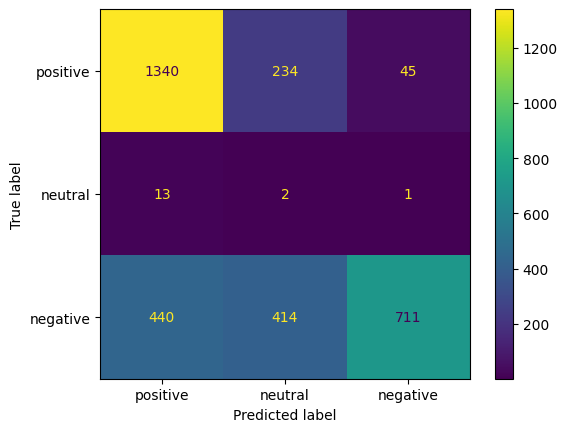

In [59]:
ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'neutral', 'negative']).plot()

In [60]:
report = classification_report(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'], output_dict=True)

In [61]:
report_df = pd.DataFrame(report).transpose()

### Saving results

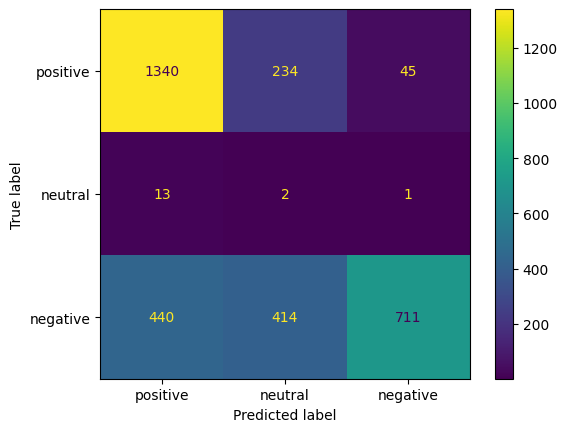

In [ ]:
sentiment.to_csv("./sentiment_analysis_vader.csv",
                 index=False, encoding="UTF-8")
report_df.to_csv("./classification_report_vader.csv",
                 index=True, encoding="UTF-8")
misclassified_df = pd.DataFrame(misclassified, index=['actual_positive', 'actual_neutral', 'actual_negative'], columns=[
                                'predicted_positive', 'predicted_neutral', 'predicted_negative'])
ConfusionMatrixDisplay(misclassified, display_labels=[
                       'positive', 'neutral', 'negative']).plot().figure_.savefig("./confusion_vader_matrix.png")